**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [40]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, error=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if error is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(error)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'A Scatterplot of X and Y with Errorbars')

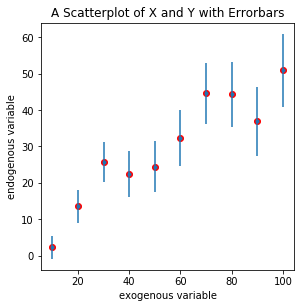

In [42]:
# creating line with slope .5

x = np.linspace(10, 100, 10)
y = line(.5, x, 0, error=x)
z = errors(x)

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, color = 'r')
ax.errorbar(x=x, y=y, yerr=z, fmt='.')
ax.set_xlabel('exogenous variable')
ax.set_ylabel('endogenous variable')
ax.set_title('A Scatterplot of X and Y with Errorbars')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [43]:
x_added = sm.add_constant(x)

print(y)  #printing y
print(x)  #printing x
print(x_added) #printing result of applying statsmodels.api.add_constant to x 

[  2.33110193  13.49554384  25.77827814  22.37108433  24.44695608
  32.38033789  44.66139375  44.28931245  36.86570524  50.93092256]
[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [44]:
# the wrong way - no constant added when listing coefficients
results = sm.OLS(y, x).fit()
results.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     316.0
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.56e-08
Time:                        12:24:26   Log-Likelihood:                -31.230
No. Observations:                  10   AIC:                             64.46
Df Residuals:                       9   BIC:                             64.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5249      0.030     17.776      0.000         0.458     0.592
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.100
Skew:                          -0.245   Prob(JB):                        0.951
Kurtosis:                       2.984   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# the right way - 'const' is listed under coefficients
results2 = sm.OLS(y, x_added).fit()
results2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     53.95
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.03e-05
Time:                        12:24:27   Log-Likelihood:                -30.581
No. Observations:                  10   AIC:                             65.16
Df Residuals:                       8   BIC:                             65.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.1434      3.934      1.053      0.323        -4.928    13.215
x1             0.4657      0.063      7.345      0.000         0.319     0.612
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.195
Skew:                          -0.074   Prob(JB):                        0.907
Kurtosis:                       2.332   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

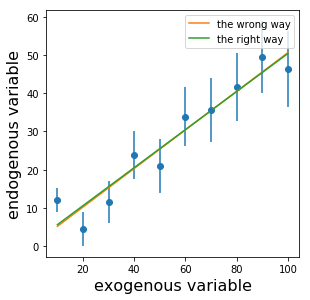

In [15]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y)

pl.errorbar(x, y, yerr=z, fmt='.')
pl.plot(x, results.fittedvalues, '-', label="the wrong way")
pl.plot(x, results2.fittedvalues, '-', label="the right way")
pl.xlabel("exogenous variable", fontsize=16)
pl.ylabel("endogenous variable", fontsize=16)
pl.title('The Right and Wrong Way to Fit a Line', fontsize = 18)
pl.legend()

Figure 2: The 'right way' and 'wrong way' to fit variables x and y. The wrong way does not pass x added with a constant, with the right way does (i.e. x_added as the exogenous variable). From the plot, it's hard to tell the difference between the two lines, but there is a small amount of orange in the bottom left hand corner showing the 'wrong way' fitted line. 

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Scatterplot of Points on Line y = .75x + 75.75')

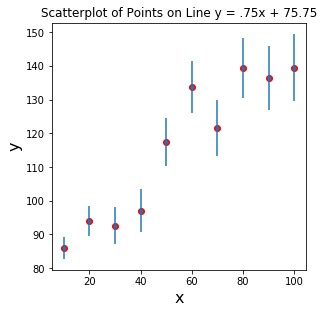

In [46]:
# plotting line with slope .75 and b <= 100*slope (so I'm doing 101)
a = .75
b = 101 * a
x = linspace(10, 100, 10)
y = line(a, x, b, error = x)
z = errors(x)

fig = pl.figure(figsize = (10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, color = 'r')
ax.errorbar(x = x, y = y, yerr = z, fmt = '.')
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('y', fontsize = 16)
ax.set_title('Scatterplot of Points on Line y = .75x + 75.75')

Figure 3: The line y = .75x + 75.75 plotted with uncertainties as errorbars. 

# 6. repeat step 3

In [28]:
# the wrong way

mod = smf.OLS(y, x).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.65e-06
Time:                        12:11:58   Log-Likelihood:                -49.204
No. Observations:                  10   AIC:                             100.4
Df Residuals:                       9   BIC:                             100.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8466      0.178     10.365      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [29]:
## the right way

x_added = sm.add_constant(x)
mod2 = smf.OLS(y, x_added).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     81.54
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.81e-05
Time:                        12:11:59   Log-Likelihood:                -34.542
No. Observations:                  10   AIC:                             73.08
Df Residuals:                       8   BIC:                             73.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         69.7044      5.846     11.923      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [31]:
## the right way
# weights = 1/z**2

wls_model = sm.WLS(y, x_added, weights = 1 / (z ** 2))
results = wls_model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            WLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.72e-06
Time:                        12:12:55   Log-Likelihood:                -33.760
No. Observations:                  10   AIC:                             71.52
Df Residuals:                       8   BIC:                             72.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         71.1389      3.529     20.160      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
